In [1]:
# Import modules
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [11]:
# Define path
path = '/Users/jryan4/Dropbox (University of Oregon)/research/clouds/data/'

# Import data
mod = netCDF4.Dataset(path + 'final_climatologies.nc')
block_se_sw = netCDF4.Dataset(path + 'myd06_radiative_flux_blocking/MYD06_SW_Fluxes_SE.nc')
block_se_lw = netCDF4.Dataset(path + 'myd06_radiative_flux_blocking/MYD06_LW_Fluxes_SE.nc')

/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_70611/1142562900.py:6: RuntimeWarning: Mean of empty slice
  mod_sw_flux = np.nanmean(mod.variables['allsky_sw'][:], axis=2) /  np.nanmean(mod.variables['clrsky_sw'][:], axis=2)
/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_70611/1142562900.py:8: RuntimeWarning: Mean of empty slice
  sw_flux_diff = (block_flux - mod_sw_flux) * np.nanmean(mod.variables['clrsky_sw'][:], axis=2)
/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_70611/1142562900.py:22: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('white')


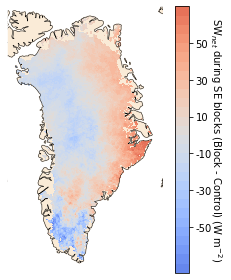

In [15]:
###############################################################################
# Figure SXa. SW during SE Greenland blocking events
###############################################################################
lons = mod.variables['longitude'][:]
lats = mod.variables['latitude'][:]
mod_sw_flux = np.nanmean(mod.variables['allsky_sw'][:], axis=2) /  np.nanmean(mod.variables['clrsky_sw'][:], axis=2) 
block_flux = block_se_sw.variables['allsky_sw'][:] /  block_se_sw.variables['clrsky_sw'][:]
sw_flux_diff = (block_flux - mod_sw_flux) * np.nanmean(mod.variables['clrsky_sw'][:], axis=2)

# Resize for more convenient plotting
sw_flux_diff = sw_flux_diff[::5,::5]
lons = lons[::5,::5]
lats = lats[::5,::5]

fig = plt.figure(figsize=(4, 4))
v = np.arange(-75, 75, 5)
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-45))
plt.contourf(lons, lats, sw_flux_diff, v, transform=ccrs.PlateCarree(), vmin=-100, vmax=100,
             cmap='coolwarm')
ax.coastlines(resolution='50m', color='black', linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='antiquewhite')
ax.outline_patch.set_edgecolor('white')
cbar = plt.colorbar(ticks=[-50, -30, -10, 10, 30, 50])
cbar.ax.set_yticklabels([-50, -30, -10, 10, 30, 50]) 
cbar.set_label('SW$_{net}$ during SE blocks (Block - Control) (W m$^{-2}$)', rotation=270, labelpad=12)
plt.tight_layout()
plt.savefig('/Users/jryan4/Dropbox (University of Oregon)/research/clouds/revised-manuscript/supp_figures/fig_sxa_se_blocking.png', dpi=200)

/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_70611/3403774917.py:6: RuntimeWarning: Mean of empty slice
  mod_lw_flux = np.nanmean(mod.variables['allsky_lw'][:], axis=2) /  np.nanmean(mod.variables['clrsky_lw'][:], axis=2)
/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_70611/3403774917.py:8: RuntimeWarning: Mean of empty slice
  lw_flux_diff = (block_flux - mod_lw_flux) * np.nanmean(mod.variables['clrsky_lw'][:], axis=2)
/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_70611/3403774917.py:22: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('white')


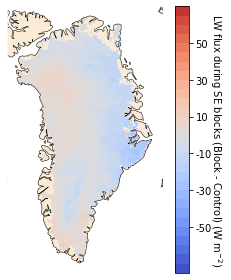

In [16]:
###############################################################################
# Figure SXa. SW during SE Greenland blocking events
###############################################################################
lons = mod.variables['longitude'][:]
lats = mod.variables['latitude'][:]
mod_lw_flux = np.nanmean(mod.variables['allsky_lw'][:], axis=2) /  np.nanmean(mod.variables['clrsky_lw'][:], axis=2) 
block_flux = block_se_lw.variables['allsky_lw'][:] /  block_se_lw.variables['clrsky_lw'][:]
lw_flux_diff = (block_flux - mod_lw_flux) * np.nanmean(mod.variables['clrsky_lw'][:], axis=2)

# Resize for more convenient plotting
lw_flux_diff = lw_flux_diff[::5,::5]
lons = lons[::5,::5]
lats = lats[::5,::5]

fig = plt.figure(figsize=(4, 4))
v = np.arange(-75, 75, 5)
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-45))
plt.contourf(lons, lats, lw_flux_diff, v, transform=ccrs.PlateCarree(), vmin=-75, vmax=75,
             cmap='coolwarm')
ax.coastlines(resolution='50m', color='black', linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='antiquewhite')
ax.outline_patch.set_edgecolor('white')
cbar = plt.colorbar(ticks=[-50, -30, -10, 10, 30, 50])
cbar.ax.set_yticklabels([-50, -30, -10, 10, 30, 50]) 
cbar.set_label('LW flux during SE blocks (Block - Control) (W m$^{-2}$)', rotation=270, labelpad=12)
plt.tight_layout()
plt.savefig('/Users/jryan4/Dropbox (University of Oregon)/research/clouds/revised-manuscript/supp_figures/fig_sxb_se_blocking.png', dpi=200)